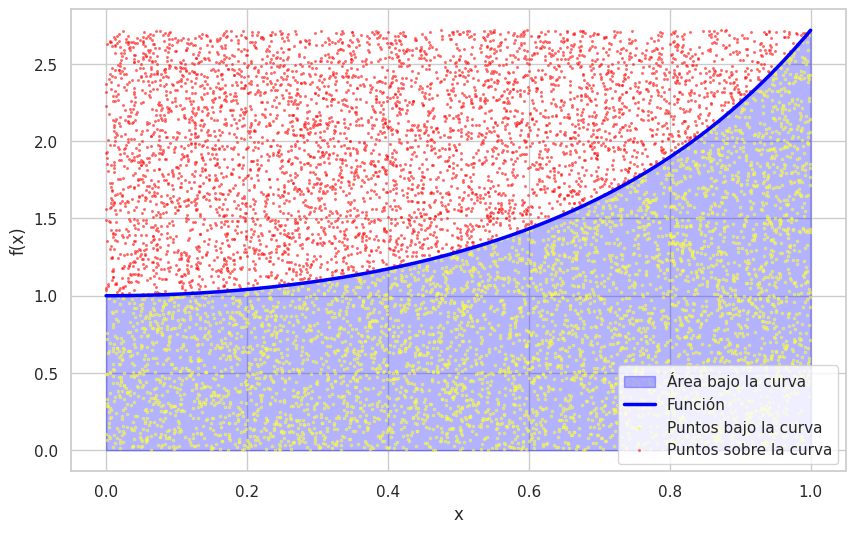

Integral de e^(x^2): 1.4344373205909506


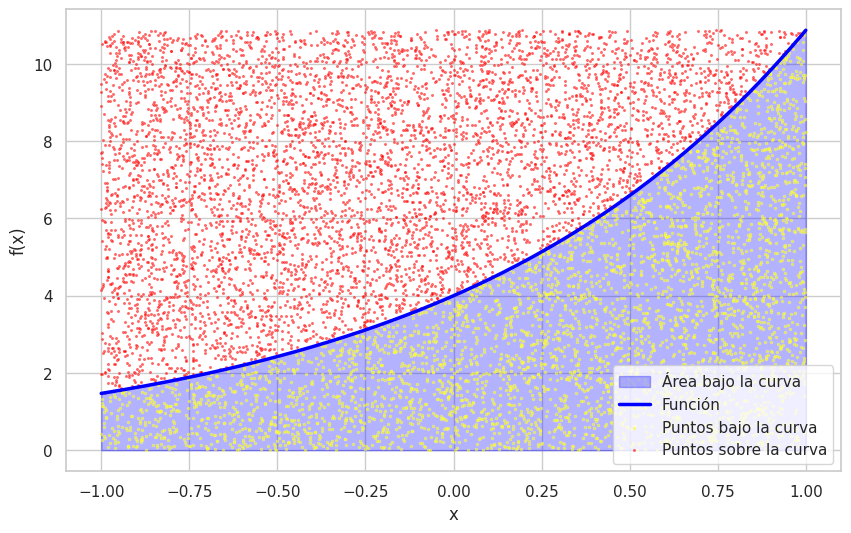

Integral de 4 * e^x: 9.181268702885145


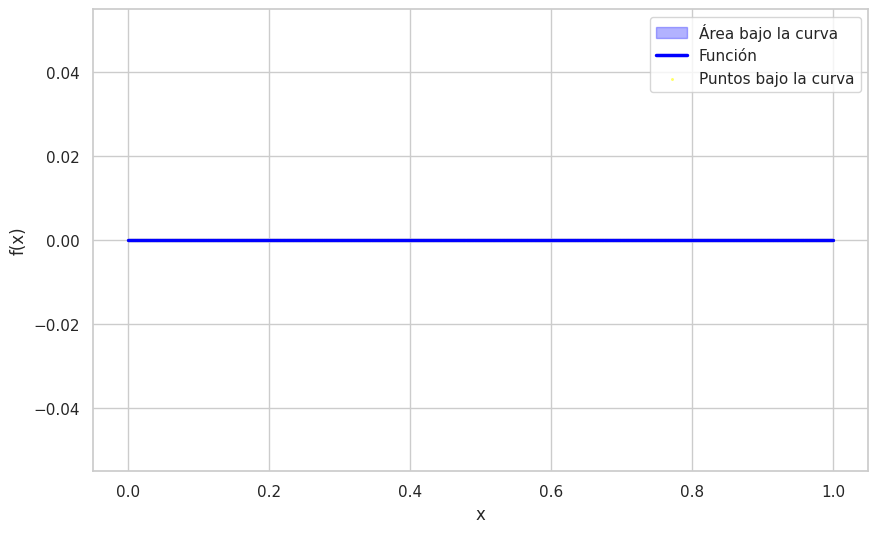

Integral de (1 - e^(x^2))^(1/2): 0.0


<ipython-input-36-9c8895795dbf>:72: RuntimeWarning: divide by zero encountered in scalar divide
  transformed_func = lambda t: func(t / (1 - t)) / (1 - t)**2
<ipython-input-36-9c8895795dbf>:49: RuntimeWarning: invalid value encountered in scalar multiply
  "x * (1 + x^2)^(-2)": lambda x: x * (1 + x**2)**(-2),


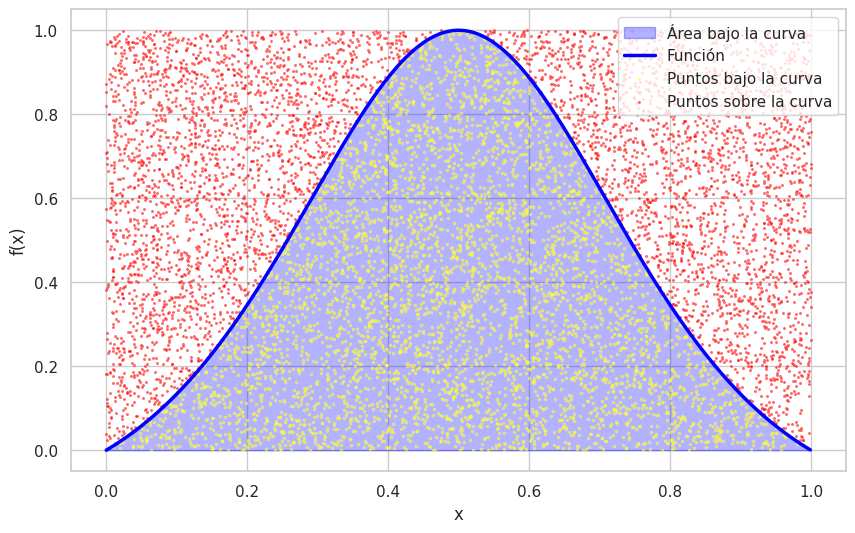

Integral de x * (1 + x^2)^(-2): 0.4976985039118139


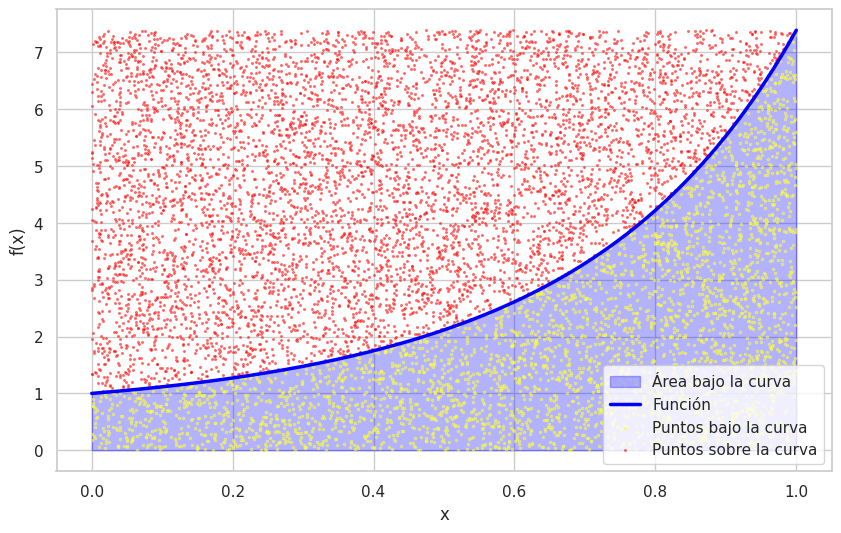

Integral de e^(x + x^2): 2.6563656667686586


<ipython-input-36-9c8895795dbf>:72: RuntimeWarning: divide by zero encountered in scalar divide
  transformed_func = lambda t: func(t / (1 - t)) / (1 - t)**2
<ipython-input-36-9c8895795dbf>:72: RuntimeWarning: invalid value encountered in scalar divide
  transformed_func = lambda t: func(t / (1 - t)) / (1 - t)**2


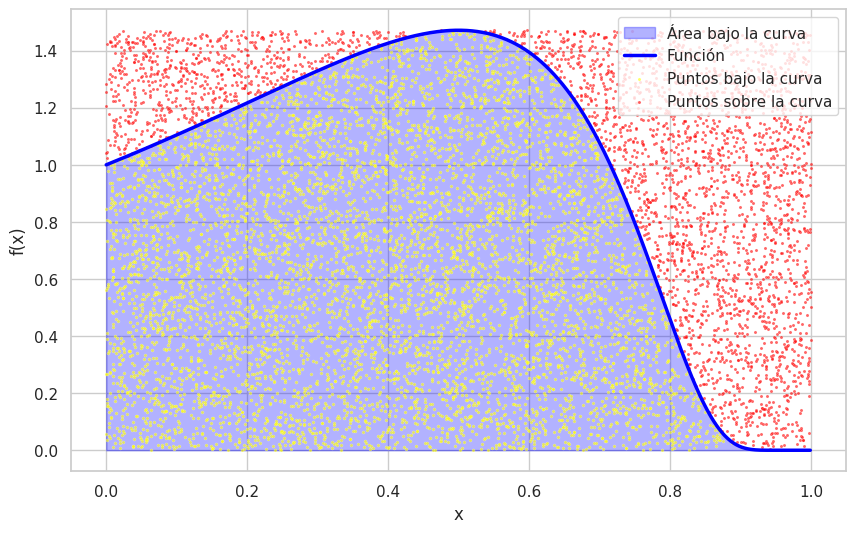

Integral de e^(-x): 0.9994538656534062


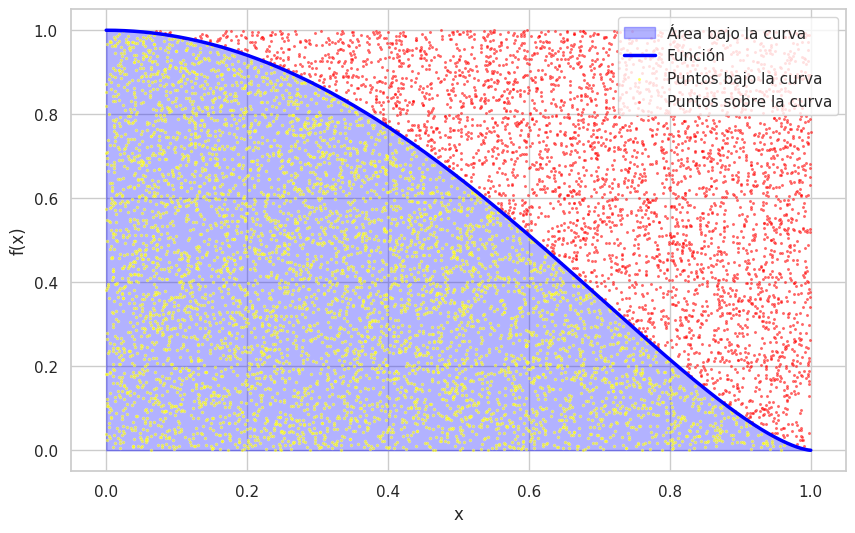

Integral de (1 - x^2)^(3/2): 0.5979


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def monte_carlo_integration(func, a, b, num_points=1000000, visualize=True, seed=None):
    np.random.seed(seed)  # Establecer semilla para la aleatoriedad
    epsilon = 1e-10  # Para evitar divisiones por cero
    x_random = np.random.uniform(a + epsilon, b - epsilon, num_points)
    try:
        y_max = max(func(x) for x in np.linspace(a + epsilon, b - epsilon, 1000))
    except ValueError:
        y_max = 1  # En caso de que la función no esté bien definida
    y_random = np.random.uniform(0, y_max, num_points)

    under_curve = y_random <= func(x_random)
    area_rectangle = (b - a) * y_max
    integral = (under_curve.sum() / num_points) * area_rectangle

    if visualize:
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        x = np.linspace(a, b, 1000)
        y = np.array([func(xi) if func(xi) >= 0 else np.nan for xi in x])  # Evitar errores en la gráfica

        # Sombrear el área bajo la curva
        plt.fill_between(x, 0, y, color='blue', alpha=0.3, label="Área bajo la curva")

        # Graficar la curva
        sns.lineplot(x=x, y=y, label='Función', color='blue', linewidth=2.5)

        # Puntos bajo y sobre la curva
        sns.scatterplot(x=x_random[under_curve], y=y_random[under_curve],
                        color='yellow', s=5, label='Puntos bajo la curva', alpha=0.6)
        sns.scatterplot(x=x_random[~under_curve], y=y_random[~under_curve],
                        color='red', s=5, label='Puntos sobre la curva', alpha=0.6)

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()

    return integral

# Ajuste de funciones
functions = {
    "e^(x^2)": lambda x: np.exp(x**2),
    "4 * e^x": lambda x: 4 * np.exp(x),
    "(1 - e^(x^2))^(1/2)": lambda x: np.sqrt(np.maximum(0, 1 - np.exp(x**2))),
    "x * (1 + x^2)^(-2)": lambda x: x * (1 + x**2)**(-2),
    "e^(x + x^2)": lambda x: np.exp(x + x**2),
    "e^(-x)": lambda x: np.exp(-x),
    "(1 - x^2)^(3/2)": lambda x: np.sqrt(np.maximum(0, (1 - x**2))**3),
}

limits = {
    "e^(x^2)": (0, 1),
    "4 * e^x": (-1, 1),
    "(1 - e^(x^2))^(1/2)": (0, 1),
    "x * (1 + x^2)^(-2)": (0, np.inf),
    "e^(x + x^2)": (0, 1),
    "e^(-x)": (0, np.inf),
    "(1 - x^2)^(3/2)": (0, 1),
}

# Semilla única para generar los números aleatorios
seed = 42

# Resolviendo las integrales
for name, func in functions.items():
    a, b = limits[name]
    if b == np.inf:  # Caso infinito
        transformed_func = lambda t: func(t / (1 - t)) / (1 - t)**2
        result = monte_carlo_integration(transformed_func, 0, 1, num_points=10000, seed=seed)
    else:
        result = monte_carlo_integration(func, a, b, num_points=10000, seed=seed)
    print(f"Integral de {name}: {result}")
